In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
df=pd.read_csv('datasetw6.csv')
df

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


# 1.Carry out descriptive analytics on the dataset.

In [3]:
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [4]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


the descriptive statistics that summarize the central tendency, minimum, maximum values and percentile of marks of students.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [6]:
df.shape

(28, 3)

There are 28 rows and 3 columns in the dataset

In [7]:
df.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

There is no null values present

<AxesSubplot:xlabel='Gender', ylabel='count'>

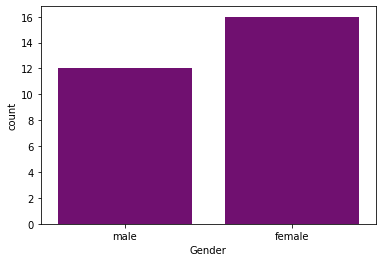

In [8]:
sns.countplot(data = df, x='Gender',color='purple')

The number of females in the given data is higher than the number of males.

<AxesSubplot:xlabel='Test preparation', ylabel='count'>

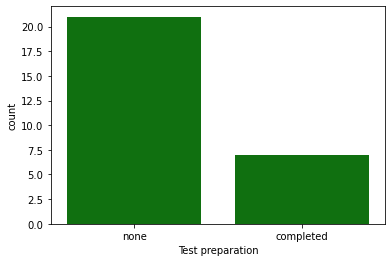

In [9]:
sns.countplot(data = df, x='Test preparation',color='green')

The above diagram shows the number of students who completed or not the test preparation. It is clear that very few students have completed the test preparation

In [10]:
df.groupby(by ='Gender')['Total Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


There are 16 females and 12 males.The descriptive statistics that summarize the central tendency, minimum, maximum values and percentile of marks of both male and female etc.

# 2.Check whether female and male students scored the same marks.

H0: female and male students did not scored the same marks.


HA: female and male students scored the same marks.

In [11]:
# seperate male and female marks.
alpha=.05
male = df[df['Gender']=='male']['Total Marks']
male




0     14
6     30
8     18
9     24
10    44
11    23
12    43
13    28
18    47
19    36
20    14
21    44
Name: Total Marks, dtype: int64

In [12]:
female = df[df['Gender']=='female']['Total Marks']
female


1     28
2     18
3     48
4     21
5     40
7     12
14    41
15    13
16    48
17    45
22    41
23    27
24    27
25    38
26    50
27    43
Name: Total Marks, dtype: int64

In [13]:
_,p = ttest_ind(male,female)
print("p value :", p)
if p < alpha:
    print("Rejecting the  H0")
else:
    print("Failing to reject the H0.")

p value : 0.4937822317960763
Failing to reject the H0.


we can conclude that female and male students did not scored the same marks.

# 3.Whether test preparation helps the students?

HO:Exam preparation does not help students


HA:Exam preparation helps the students

In [14]:
alpha=.05
tpnone = df[df['Test preparation']=='none']['Total Marks']
tpnone



0     14
1     28
2     18
3     48
4     21
6     30
7     12
8     18
9     24
11    23
13    28
14    41
15    13
17    45
18    47
19    36
20    14
22    41
23    27
24    27
25    38
Name: Total Marks, dtype: int64

In [15]:
tpcompl = df[df['Test preparation']=='completed']['Total Marks']
tpcompl

5     40
10    44
12    43
16    48
21    44
26    50
27    43
Name: Total Marks, dtype: int64

In [16]:
_,p=ttest_ind(tpnone,tpcompl)
print (p)

0.0012671292457320106


In [17]:
if p<alpha:
     print(" rejecting the HO")
else:
    print("failing to reject the HO")

 rejecting the HO


Exam preparation helps the students